#### Here are the steps required:
    
* Calculate Euclidean distance between the test_instance and each row of the train_set

* Sort the distances by distance value, from lowest to highest

* Keep the distance of the ksmallest ones

* Get values of a target variable for k train_setrows with the smallest distance

* Whichever target variable class has the majority, wins

![img.png](https://miro.medium.com/max/325/1*waKQdAXEqI8e4_e92cSxFw.png)

![img.png](https://miro.medium.com/max/289/1*osRS3cOX9FDsSu4rihnYDA.png)

In [1]:
import numpy as np
from collections import Counter

#### importing iris datset 

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [4]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [5]:
X.shape, y.shape

((150, 4), (150,))

In [6]:
X_train[:5]

array([[5.1, 2.5, 3. , 1.1],
       [6.2, 2.8, 4.8, 1.8],
       [5. , 3.5, 1.3, 0.3],
       [6.3, 2.8, 5.1, 1.5],
       [6.7, 3. , 5. , 1.7]])

In [7]:
y_train[:5]## three class problem

array([1, 2, 0, 2, 1])

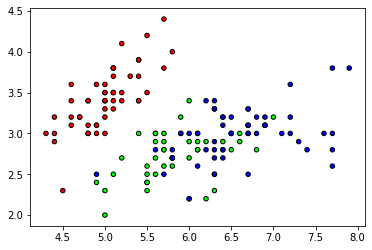

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k', s=20)#plotting first two features
plt.show()

In [11]:
def euclidean_distance(x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

In [12]:
class KNN:
    
    def __init__(self , k=3):
        self.k  = k
        
    def fit(self,X,y):
        self.X_train= X
        self.y_train= y
    
    def predict(self,X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)
        
    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]  
        # return the most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]  

In [14]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [18]:
k = 5
clf1 = KNN(k=k)
clf1.fit(X_train, y_train)
predictions = clf1.predict(X_test)
print("custom KNN classification accuracy", accuracy(y_test, predictions))

custom KNN classification accuracy 0.9666666666666667


In [19]:
k = 3
clf1 = KNN(k=k)
clf1.fit(X_train, y_train)
predictions = clf1.predict(X_test)
print("custom KNN classification accuracy", accuracy(y_test, predictions))

custom KNN classification accuracy 1.0
